# Gerardo de Miguel González

# Binary Classification Proof of Concept

## Libraries

### general

In [1]:
import pandas as pd
import numpy as np

In [2]:
#::GMG::seaborn: statistical data visualization for a heatmap of pandas.corr()
#::NOTE::There's a lot of fuss for 'heatmapping' with matplotlib only
# https://matplotlib.org/3.1.0/gallery/images_contours_and_fields/image_annotated_heatmap.html
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#::GMG::Helpers
# https://stackabuse.com/how-to-format-dates-in-python/
import datetime

### training and testing

In [4]:
#::GMG::Split train and test: Provides a high-variance estimate of out-of-sample accuracy
# It is a general practice to avoid training and testing on the same data.
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection
from sklearn.model_selection import train_test_split

In [5]:
#::GMG::k-fold split and CV score
# https://scikit-learn.org/stable/modules/cross_validation.html
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html
from sklearn.model_selection import KFold, cross_val_score, cross_validate

In [6]:
#::GMG::Hyperparameter model optimization strategy
from sklearn.model_selection import GridSearchCV, StratifiedKFold

### model

In [7]:
#::GMG::Logistic Regression (aka logit) for classification
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression

### persistence

In [8]:
#::GMG::Persistence of the models
# https://docs.python.org/3.6/library/pickle.html
# https://scikit-learn.org/stable/modules/model_persistence.html
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
import pickle as pk

### metrics

In [9]:
#::GMG::Accuracy and Balanced Accuracy for taking into account the dataset (im)balance
# https://scikit-learn.org/stable/modules/model_evaluation.html#balanced-accuracy-score
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html#sklearn.metrics.balanced_accuracy_score
from sklearn.metrics import accuracy_score, balanced_accuracy_score

In [10]:
#::GMG::ROC/AUC
# https://en.wikipedia.org/wiki/Receiver_operating_characteristic
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html
from sklearn.metrics import roc_curve, roc_auc_score 
from sklearn.metrics import precision_recall_curve, auc, average_precision_score

In [11]:
#::GMG::More metrics
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
from sklearn.metrics import precision_score, recall_score, f1_score

In [12]:
#::GMG::NOTE::one report for all metrics and confusion matrix
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
# https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Dataset

### load

**::GMG::** You may [download the data from kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database/downloads/pima-indians-diabetes-database.zip/1) in zipped csv format (which *includes a header* with the column names by the way) using [the reference provided](https://www.kaggle.com/uciml/pima-indians-diabetes-database) in the Datacamp article *if you have an account in kaggle*. I haven't checked it but you should be able [to use the kaggle API](https://medium.com/@yvettewu.dw/tutorial-kaggle-api-google-colaboratory-1a054a382de0) to automate the download from code *with an API key* created with your account. 

**::GMG::** I've already downloaded the csv dataset *manually from kaggle* (with my account  and placed it in a data folder.

In [13]:
!ls data

pima-indians-diabetes.csv


In [14]:
#::GMG::Dataframe
data = pd.read_csv("data/pima-indians-diabetes.csv")

In [15]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


**::GMG::** There are 8 different integer and real features and the categorical (binary) *Outcome* (i.e. classification) where 1 stands for having diabetes, and 0 denotes not havving diabetes. The dataset is known to have missing values. Specifically, there are missing observations for some columns that are marked as a zero value. A zero value will be invalid for for body mass index or blood pressure, for example.

In [16]:
print("Diabetes data set dimensions : {}".format(data.shape))

Diabetes data set dimensions : (768, 9)


**::GMG::** To be honest I can't see any difference whatsoever. I'm going to stick with the kaggle dataset I've downloaded.

### exploratory data analysis

In [17]:
#::GMG::Do the cleaning if need be
# https://towardsdatascience.com/machine-learning-workflow-on-diabetes-data-part-01-573864fcc6b8
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [18]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [19]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [20]:
#::GMG::Statistics reveal some issues related to invalid values on some features, 
#       i.e. Glucose, BloodPressure, SkinThickness, Insulin and BMI 
#       which have ZEROS (min statistic) in their values!
#::NOTE::Do I need to standarize (scale) the features too?
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

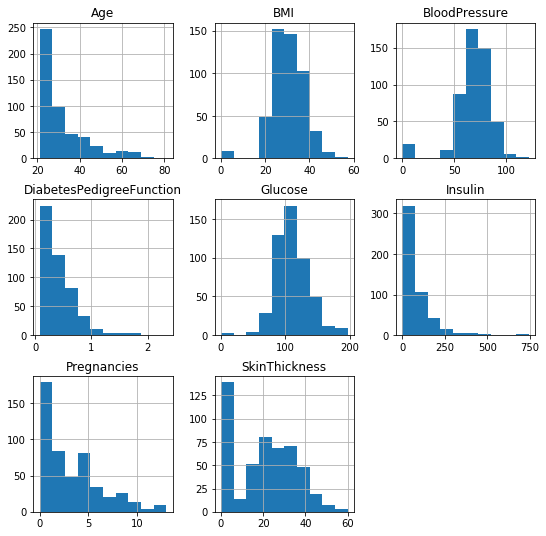

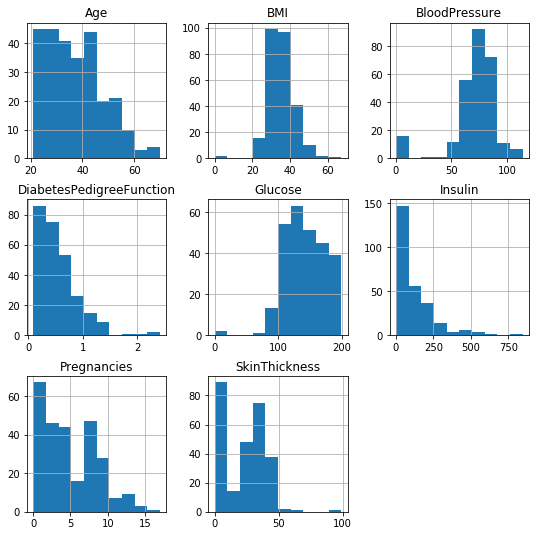

In [21]:
#::GMG::Histograms of the features grouped by Outcome
# https://towardsdatascience.com/machine-learning-workflow-on-diabetes-data-part-01-573864fcc6b8
#::NOTE::I can see the zeros in BMI, BloodPressure, Glucose, Insulin and SkinThickness!
data.groupby('Outcome').hist(figsize=(9, 9))

In [22]:
#::GMG::Unexpected outliers, as I've just said from data.describe() ...
#       Glucose, Insulin, BloodPressure, SkinThickness, and BMI 
#       which have zeros (min) in their values
# https://towardsdatascience.com/machine-learning-workflow-on-diabetes-data-part-01-573864fcc6b8
print("Zero Plasma Glucose  Total : ", data[data.Glucose == 0].shape[0])
print("Zero Insulin level   Total : ", data[data.Insulin == 0].shape[0])
print("Zero Blood Pressure  Total : ", data[data.BloodPressure == 0].shape[0])
print("Zero Skin Thickness  Total : ", data[data.SkinThickness == 0].shape[0])
print("Zero Body Mass Index Total : ", data[data.BMI == 0].shape[0])

Zero Plasma Glucose  Total :  5
Zero Insulin level   Total :  374
Zero Blood Pressure  Total :  35
Zero Skin Thickness  Total :  227
Zero Body Mass Index Total :  11


In [23]:
#::GMG::Hard choice to make ... remove the rows where the “BloodPressure”, 
#       “BMI” and “Glucose” are zero (small number of rows, low impact)
data_mod = data[(data.BloodPressure != 0) & 
                (data.BMI != 0) & 
                (data.Glucose != 0)
               ]

In [24]:
print(data_mod.shape)

(724, 9)


**::GMG::** The problem with `Insulin` and `Skin Thickness` is that they are a significant part of the dataset. They cannot be removed. I may use **an imputation method** to fill in the zeros, i.e. put *average/mean values*, but in this case putting a mean value to the blood pressure column *would send a wrong signal to the model*. I may also **avoid using the features** involved. Feature selection by filtering might come in handy and help with that. But the filter is going to use the *outliered* feature ... so I'm in doubt here!

In [25]:
#::GMG::Some basic (Pearson) correlations with Outcome
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
correlation_matrix = data_mod.corr()
correlation_matrix['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.488384
BMI                         0.299375
Age                         0.245741
Pregnancies                 0.224417
DiabetesPedigreeFunction    0.184947
BloodPressure               0.166703
Insulin                     0.145488
SkinThickness               0.092030
Name: Outcome, dtype: float64

**::GMG::** Based on this basic analysis I might avoid using `Skin Thickness` but not `Insulin` .

**::NOTE::** I've [searched](https://www.google.com/search?client=firefox-b-d&q=a+person+can+have+zero+insulin%3F) about this *zero insulin issue*. So [it turns out](https://www.yourhormones.info/hormones/insulin/) that

> People with type 1 diabetes produce very little or no insulin at all. This condition is caused when the beta cells that make insulin have been destroyed by antibodies (these are usually substances released by the body to fight against infections), hence they are unable to produce insulin.

In [26]:
#::GMG::I make a bold choice ...
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
data_final = data_mod.drop(columns = ['SkinThickness'])
print(data_final.shape)

(724, 8)


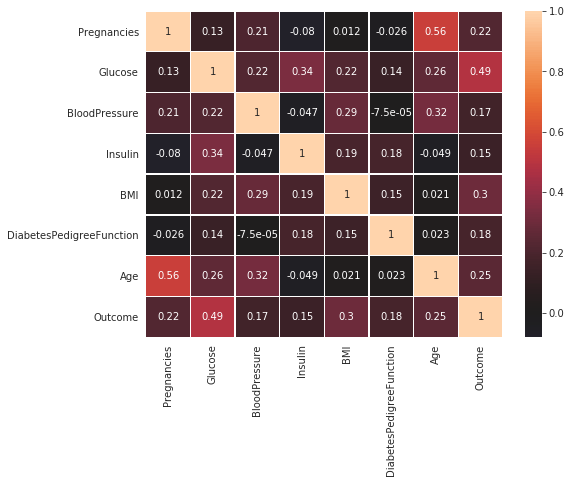

In [27]:
#::GMG::Not much insight from these corr() numbers
color = sns.color_palette()
sns.set_style('darkgrid')
plt.subplots(figsize=(8,6))
sns.heatmap(data_final.corr(), center=0, annot=True, linewidths=.3)

In [28]:
#::GMG::Beware of the imbalance dataset ...
#       https://www.quora.com/What-is-an-imbalanced-dataset
#       https://www.datacamp.com/community/tutorials/diving-deep-imbalanced-data
#       https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18
#       How do I check?
# https://towardsdatascience.com/machine-learning-workflow-on-diabetes-data-part-01-573864fcc6b8
data_final.groupby('Outcome').size()

Outcome
0    475
1    249
dtype: int64

Text(0, 0.5, 'Frequency %')

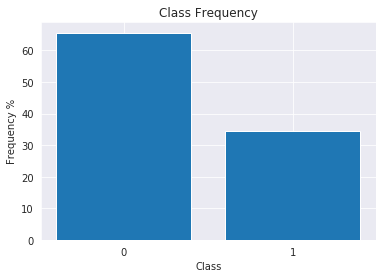

In [29]:
#::GMG::Say, 0 healthy, 1 diabetes
# https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.chararray.astype.html
# https://matplotlib.org/gallery/lines_bars_and_markers/categorical_variables.html
classes = data_final.Outcome.values
unique, counts = np.unique(classes, return_counts=True)
plt.bar(unique.astype(np.character),100*counts/classes.size)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency %')

## Stratified Split

In [30]:
#::GMG::Let`s try something different
#       I'm going to preserve the proportions of classes with stratify parameter
# https://stackoverflow.com/questions/34842405/parameter-stratify-from-method-train-test-split-scikit-learn
x_train, x_test, y_train, y_test = train_test_split(
    data_final.iloc[:,:data_final.shape[1] - 1], data_final['Outcome'],
    test_size = 0.3,
    random_state = 70,
    stratify = data_final['Outcome']
)

In [31]:
classes_train = y_train.values
unique, counts = np.unique(classes_train, return_counts = True)

Text(0, 0.5, 'Frequency %')

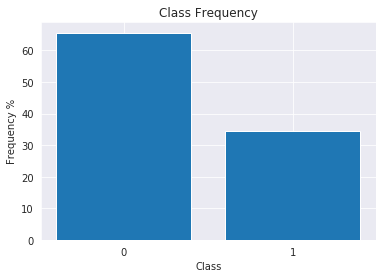

In [32]:
plt.bar(unique.astype(np.character),100*counts/classes_train.size)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency %')

In [33]:
classes_test = y_test.values
unique, counts = np.unique(classes_test, return_counts = True)

Text(0, 0.5, 'Frequency %')

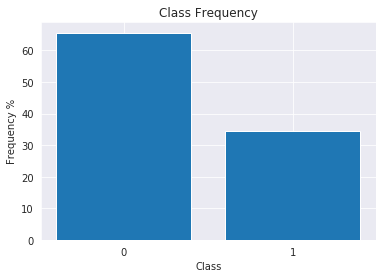

In [34]:
plt.bar(unique.astype(np.character),100*counts/classes_test.size)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency %')

In [35]:
x_train.shape, y_train.shape

((506, 7), (506,))

In [36]:
x_test.shape, y_test.shape

((218, 7), (218,))

## Logit Classifier

### model

In [37]:
#::GMG::I must tell the solver I want, otherwise it yields:
#
#        'FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. 
#         Specify a solver to silence this warning. FutureWarning)'
#
# when doing model.fit()
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# 'For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster 
#  for large ones.'
lr = LogisticRegression(solver = 'liblinear', random_state = 1)

### fit and predict

In [38]:
lr = LogisticRegression(solver = 'liblinear')

In [39]:
lr.fit(X = x_train, y = y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [40]:
pred_s = lr.predict(X = x_test)

In [41]:
print('Train Score: {:4.3f} \nTest Score: {:4.3f}'.format(
    lr.score(X = x_train, y = y_train), 
    lr.score(X = x_test, y = y_test)
  )
)

Train Score: 0.759 
Test Score: 0.803


### evaluation

In [42]:
#::GMG::Report with all the metrics and averages per class related to precision and recall
target_names = ['healthy', 'diabetes']
print('Classification Report:\n')
print(classification_report(y_true = y_test, y_pred = pred_s, 
                            target_names = target_names, digits = 3))

Classification Report:

              precision    recall  f1-score   support

     healthy      0.801     0.930     0.861       143
    diabetes      0.808     0.560     0.661        75

   micro avg      0.803     0.803     0.803       218
   macro avg      0.804     0.745     0.761       218
weighted avg      0.803     0.803     0.792       218



In [43]:
#::GMG::Confusion matrix (I can campute all the metrics from it)
cm_s = confusion_matrix(y_true = y_test, y_pred = pred_s)
print (cm_s)

[[133  10]
 [ 33  42]]


In [44]:
#::GMG::Unfolding of confusion matrix: True Negatives, False Positives, False Negatives
#       and True positives where Negative = Healthy and Positive = Diabetes
tn, fp, fn, tp = cm_s.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
print('Specificity: {:4.3f} \nSensitivity: {:4.3f}'.format(specificity, sensitivity))

Specificity: 0.930 
Sensitivity: 0.560


In [45]:
#::GMG::Accuracy versus Balanced Accuracy
print('Accuracy: {:4.3f} \nBalanced Accuracy: {:4.3f}'.format(
    accuracy_score(y_true = y_test, y_pred = pred_s), 
    balanced_accuracy_score(y_true = y_test, y_pred = pred_s)
  )
)

Accuracy: 0.803 
Balanced Accuracy: 0.745


In [46]:
#::GMG::AUC (imbalanced dataset -> average = 'weighted')
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
# 'weighted': Calculate metrics for each label, and find their average, weighted by 
#             support (the number of true instances for each label)
probs = lr.predict_proba(X = x_test)
prob = probs[:, 1] 
auc_roc = roc_auc_score(y_true = y_test, y_score = prob, average = 'weighted')
print('AUC diabetes: {:4.3f}'.format(auc_roc))

AUC diabetes: 0.866


In [47]:
#::GMG::ROC
# https://stackabuse.com/understanding-roc-curves-with-python/
# https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics
# https://stackoverflow.com/questions/2891790/how-to-pretty-print-a-numpy-array-without-scientific-notation-and-with-given-pre
fpr, tpr, thresholds = roc_curve(
    y_true = y_test, 
    y_score = prob, 
    pos_label = 1
)
print('fpr: {} \ntpr: {} \ntherholds: {}'.format(
    np.array_str(a = fpr, precision = 3), 
    np.array_str(a = tpr, precision = 3), 
    np.array_str(a = thresholds, precision = 3)
    )
)

fpr: [0.    0.007 0.007 0.014 0.014 0.021 0.021 0.028 0.028 0.035 0.035 0.042
 0.042 0.049 0.049 0.056 0.056 0.07  0.07  0.077 0.077 0.105 0.105 0.112
 0.112 0.133 0.133 0.154 0.154 0.168 0.168 0.182 0.182 0.301 0.301 0.315
 0.315 0.322 0.322 0.357 0.357 0.385 0.385 0.42  0.42  0.517 0.517 0.552
 0.552 0.678 0.678 1.   ] 
tpr: [0.    0.    0.027 0.027 0.093 0.093 0.16  0.16  0.36  0.36  0.493 0.493
 0.507 0.507 0.533 0.533 0.56  0.56  0.587 0.587 0.653 0.653 0.667 0.667
 0.693 0.693 0.747 0.747 0.76  0.76  0.8   0.8   0.813 0.813 0.827 0.827
 0.84  0.84  0.853 0.853 0.867 0.867 0.88  0.88  0.907 0.907 0.92  0.92
 0.973 0.973 1.    1.   ] 
therholds: [1.935 0.935 0.876 0.87  0.809 0.789 0.754 0.747 0.667 0.651 0.56  0.557
 0.546 0.532 0.53  0.528 0.513 0.509 0.486 0.477 0.46  0.447 0.444 0.434
 0.425 0.415 0.405 0.383 0.378 0.361 0.351 0.34  0.332 0.297 0.287 0.286
 0.286 0.284 0.282 0.276 0.276 0.27  0.265 0.254 0.252 0.22  0.216 0.209
 0.201 0.173 0.169 0.047]


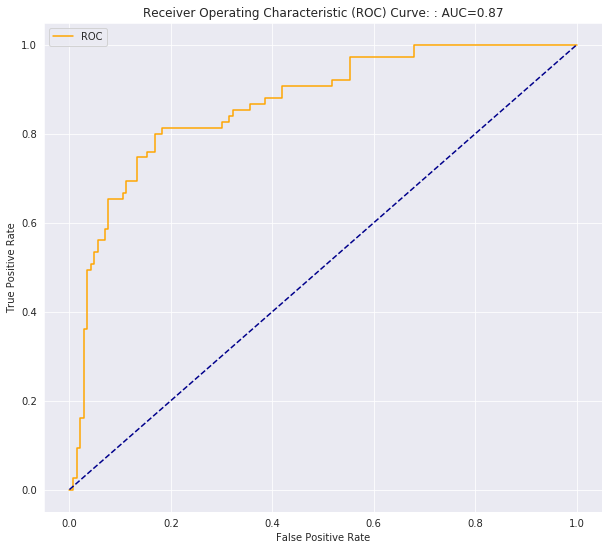

In [48]:
#::GMG::Plot ROC
# https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
# https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
plt.figure(figsize = (10,9))
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(
    'Receiver Operating Characteristic (ROC) Curve: AUC={0:0.2f}'.format(auc_roc)
)
plt.legend()

In [49]:
#::GMG::Precision-Recall Curve and AUC, and average precision are better metrics 
#       with an imbalanced dataset
# https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html
apc = average_precision_score(y_true = y_test, 
                              y_score = prob, 
                              pos_label = 1, 
                              average = 'weighted')
print('Average Precision Weighted: {:4.3f}'.format(apc))

Average Precision Weighted: 0.740


In [50]:
#::GMG::Precision-Reacall Curve
precision, recall, _ = precision_recall_curve(
    y_true = y_test, 
    probas_pred = prob, 
    pos_label = 1
)

In [51]:
#::GMG::AUC (recall, precision)
auc_pr = auc(x = recall, y = precision)
print('AUC Precision/Recall: {:4.3f}'.format(auc_pr))

AUC Precision/Recall: 0.731


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.74')

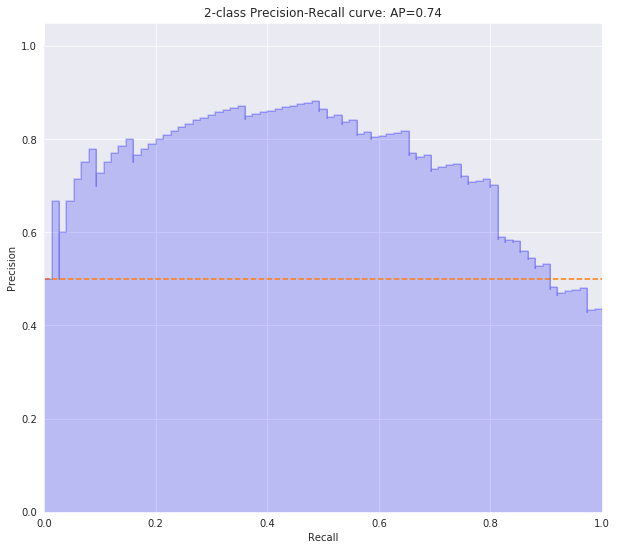

In [52]:
#::GMG::Precision-Recall plot 
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py
from inspect import signature
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.figure(figsize = (10,9))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--', color = 'C1')
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(apc))

### balanced model

In [53]:
#::GMG::class_weight : dict or ‘balanced’, optional (default=None)
#       The “balanced” mode uses the values of y to automatically adjust weights inversely 
#       proportional to class frequencies in the input data as 
#       n_samples / (n_classes * np.bincount(y))
#
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
lr_bm = LogisticRegression(solver = 'liblinear', class_weight = 'balanced', random_state = 2)

### fit and predict

In [54]:
#::GMG::Train the model
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit
#
# sample_weight : array-like, shape (n_samples,) optional
lr_bm.fit(X = x_train, y = y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=2,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [55]:
#::GMG::Now it's time to predict
pred_bm = lr_bm.predict(X = x_test)

In [56]:
#::GMG::Scores
print('Score Train: {:4.3f} \nScore Test: {:4.3f}'.format(
    lr_bm.score(X = x_train, y = y_train),
    lr_bm.score(X = x_test, y = y_test)
    )
)

Score Train: 0.745 
Score Test: 0.817


### evaluation

In [57]:
#::GMG::Report
print(classification_report(y_true = y_test, y_pred = pred_bm, 
                            target_names=target_names, digits = 3))

              precision    recall  f1-score   support

     healthy      0.881     0.832     0.856       143
    diabetes      0.711     0.787     0.747        75

   micro avg      0.817     0.817     0.817       218
   macro avg      0.796     0.809     0.801       218
weighted avg      0.823     0.817     0.819       218



In [58]:
#::GMG::Confusion Matrix
cm_bm = confusion_matrix(y_true = y_test, y_pred = pred_bm)
print(cm_bm)

[[119  24]
 [ 16  59]]


In [68]:
#::GMG::Unfolding of confusion matrix: True Negatives, False Positives, False Negatives
#       and True positives where Negative = Healthy and Positive = Diabetes
tn_bm, fp_bm, fn_bm, tp_bm = cm_bm.ravel()
specificity_bm = tn_bm / (tn_bm + fp_bm)
sensitivity_bm = tp_bm / (tp_bm + fn_bm)
print(
    'BM Specificity: {:4.3f} \nBM Sensitivity: {:4.3f}'.format(
        specificity_bm, sensitivity_bm
    )
)

BM Specificity: 0.832 
BM Sensitivity: 0.787


In [69]:
#::GMG::Accuracy versus Balanced Accuracy
print('BM Accuracy: {:4.3f} \nBM Balanced Accuracy: {:4.3f}'.format(
    accuracy_score(y_true = y_test, y_pred = pred_bm), 
    balanced_accuracy_score(y_true = y_test, y_pred = pred_bm)
  )
)

BM Accuracy: 0.817 
BM Balanced Accuracy: 0.809


In [60]:
#::GMG::AUC
prob_bm = lr_bm.predict_proba(X = x_test)[:, 1] 
auc_bm = roc_auc_score(y_true = y_test, y_score = prob_bm, average = 'weighted')
print('AUC diabetes: {:4.3f} \nAUC Balanced Mode diabetes: {:4.3f}'.format(auc_roc, auc_bm))

AUC diabetes: 0.866 
AUC Balanced Mode diabetes: 0.866


In [61]:
#::GMG::ROC Curve
fpr_bm, tpr_bm, thresholds_bm = roc_curve(
    y_true = y_test, 
    y_score = prob_bm, 
    pos_label = 1
)
print('fpr: {} \ntpr: {} \ntherholds: {}'.format(
    np.array_str(a = fpr_bm, precision = 3), 
    np.array_str(a = tpr_bm, precision = 3), 
    np.array_str(a = thresholds_bm, precision = 3)
    )
)

fpr: [0.    0.007 0.007 0.014 0.014 0.021 0.021 0.028 0.028 0.035 0.035 0.049
 0.049 0.056 0.056 0.063 0.063 0.07  0.07  0.077 0.077 0.084 0.084 0.098
 0.098 0.105 0.105 0.133 0.133 0.147 0.147 0.154 0.154 0.161 0.161 0.168
 0.168 0.175 0.175 0.203 0.203 0.28  0.28  0.322 0.322 0.336 0.336 0.371
 0.371 0.392 0.392 0.399 0.399 0.42  0.42  0.51  0.51  0.545 0.545 0.671
 0.671 0.678 0.678 1.   ] 
tpr: [0.    0.    0.013 0.013 0.093 0.093 0.147 0.147 0.347 0.347 0.507 0.507
 0.533 0.533 0.547 0.547 0.587 0.587 0.6   0.6   0.627 0.627 0.64  0.64
 0.667 0.667 0.68  0.68  0.72  0.72  0.747 0.747 0.76  0.76  0.773 0.773
 0.787 0.787 0.8   0.8   0.813 0.813 0.827 0.827 0.84  0.84  0.853 0.853
 0.867 0.867 0.88  0.88  0.893 0.893 0.907 0.907 0.933 0.933 0.973 0.973
 0.987 0.987 1.    1.   ] 
therholds: [1.967 0.967 0.942 0.941 0.899 0.883 0.859 0.857 0.799 0.798 0.71  0.699
 0.693 0.686 0.679 0.679 0.657 0.642 0.626 0.625 0.613 0.612 0.61  0.605
 0.603 0.602 0.593 0.578 0.574 0.564 0.556 0.555 0

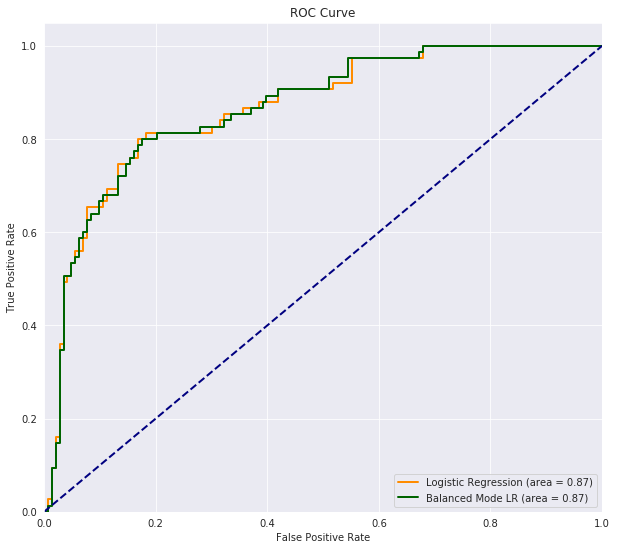

In [63]:
#::GMG::Plot ROC Curve
plt.figure(figsize = (10,9))
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='Logistic Regression (area = %0.2f)' % auc_roc)
plt.plot(fpr_bm, tpr_bm, color='darkgreen',
         lw=2, label='Balanced Mode LR (area = %0.2f)' % auc_bm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

In [64]:
#::GMG::average precision 
apc_bm = average_precision_score(y_true = y_test, 
                                 y_score = prob_bm, 
                                 pos_label = 1, 
                                 average = 'weighted')
print('Average Precision Weighted: {:4.3f}'.format(apc_bm))

Average Precision Weighted: 0.736


In [65]:
#::GMG::Precision-Recall Curve
precision_bm, recall_bm, _ = precision_recall_curve(
    y_true = y_test, 
    probas_pred = prob_bm, 
    pos_label = 1
)

In [66]:
#::GMG::AUC (precision, recall)
auc_pr_bm = auc(x = recall_bm, y = precision_bm)
print('AUC Precision/Recall: {:4.3f}'.format(auc_pr_bm))

AUC Precision/Recall: 0.727


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.74')

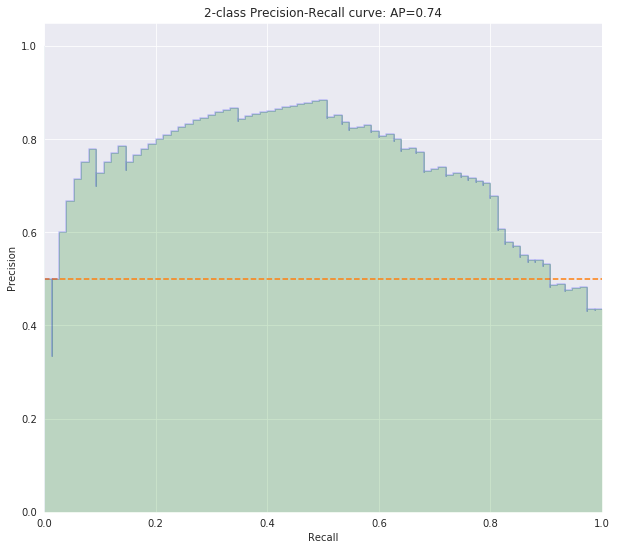

In [67]:
#::GMG::Plot Recall-Precision Curve
plt.figure(figsize = (10,9))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--', color = 'C1')
plt.step(recall_bm, precision_bm, color='g', alpha=0.2, where='post')
plt.fill_between(recall_bm, precision_bm, alpha=0.2, color='g', **step_kwargs)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(apc_bm))

## Model Parameter Tuning

**::GMG::** I'm going to use [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) from [Scikit-learn](https://scikit-learn.org/stable/modules/grid_search.html#grid-search) to *tune the hyperparameters* of the [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model. There's an [example](https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html) in the Scikit-learn documentation that uses `SVM` model and cross-validation. In [second part article](https://towardsdatascience.com/machine-learning-workflow-on-diabetes-data-part-02-11262b7f7a5c) *Machine Learning Workflow on Diabetes Data* by Lahiru Liyanapathirana this is done in *phase 6* (see also [the code](https://github.com/LahiruTjay/Machine-Learning-With-Python/blob/master/Machine%20Learning%20Workflow%20on%20Diabetes%20Data.ipynb) in Github)

**::GMG::** Lahiru Liyanapathirana gives a useful warning on using [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) with a particular model:

> Important : When using the GridSearchCV, there are some models which have parameters that don’t work with each other. Since GridSearchCV uses combinations of all the parameters given, if two parameters don’t work with each other we will not be able to run the GridSearchCV.
>
> If that happens, a list of parameter grids can be provided to overcome the given issue. **It is recommended that you read the class document of the which you are trying to fine tune, to find how parameters work with each other.**

**::GMG::** This clearly applies to [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) models.

### gridsearchcv

In [88]:
#::GMG::Logistic Regression model has some hyperparameters that doesn’t work with each other.
#       Here is a list of grids with compatible parameters to fine tune the model. Through trial 
#       and error the following compatible parameters were found. By Lahiru Liyanapathirana
#       See: https://towardsdatascience.com/machine-learning-workflow-on-diabetes-data-part-02-11262b7f7a5c
#       Specify parameters:
#
#c_values = list(np.arange(1, 10))
#
#::NOTE::There's an alternative of ranging C I've seen in an article by Finn Qiao
#        I like the way of ranging the C parameter in the log scale
# https://towardsdatascience.com/logistic-regression-model-tuning-with-scikit-learn-part-1-425142e01af5
# https://docs.scipy.org/doc/numpy-1.16.1/reference/generated/numpy.logspace.html  
c_values = np.logspace(-3, 3, 20)
param_grid_a = [
    {'C': c_values, 
     'penalty': ['l1'], 
     'solver' : ['liblinear'], 
     'multi_class' : ['ovr']
    },
    {'C': c_values, 
     'penalty': ['l2'], 
     'solver' : ['liblinear', 'newton-cg', 'lbfgs'], 
     'multi_class' : ['ovr']
    }
]

In [71]:
#::GMG::I use StratifiedKFold to keep the (im)balance between the two classes
#::NOTE::In GridSearchCV documentation it says that
#        cv : int, cross-validation generator or an iterable, optional
#        Determines the cross-validation splitting strategy.
#        For integer/None inputs, if the estimator is a classifier and y is either binary or 
#        multiclass, StratifiedKFold is used. In all other cases, KFold is used.
# BUT I purposedly define a Stratified-10-Fold cross-validation generator ;)
strat_k_fold = StratifiedKFold(n_splits=10, random_state = 10)

In [90]:
#::GMG::Build up the grid object 
#::NOTE::scoring : string, callable, list/tuple, dict or None, default: None
#        For evaluating multiple metrics, either give a list of (unique) strings or 
#        a dict with names as keys and callables as values.
# https://scikit-learn.org/stable/modules/grid_search.html#multimetric-grid-search
# https://scikit-learn.org/stable/modules/model_evaluation.html#multimetric-scoring
#
#::NOTE::refit : boolean, string, or callable, default=True
#       Refit an estimator using the best found parameters on the whole dataset.
#       The refitted estimator is made available at the best_estimator_ attribute and 
#       permits using predict directly on this GridSearchCV instance.
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#
#::NOTE::If I want to do multiple scoring
#scoring = ['balanced_accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
grid_1 = GridSearchCV(
    LogisticRegression(random_state = 1, max_iter = 1000, class_weight = 'balanced'), 
    param_grid_a, 
    cv = strat_k_fold, 
    refit = True,
    return_train_score = True, #::NOTE:: to avoid FutureWarning: You are accessing a training score
    verbose = True,
    iid = False,
    scoring = 'balanced_accuracy'
)

### fit and predict

In [91]:
#::GMG::Run fit with all sets of parameters.
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV.fit
grid_1.fit(x_train, y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:   44.5s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=10, shuffle=False),
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1000,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=1,
          solver='warn', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=None,
       param_grid=[{'C': array([1.00000e-03, 2.06914e-03, 4.28133e-03, 8.85867e-03, 1.83298e-02,
       3.79269e-02, 7.84760e-02, 1.62378e-01, 3.35982e-01, 6.95193e-01,
       1.43845e+00, 2.97635e+00, 6.15848e+00, 1.27427e+01, 2.63665e+01,
       5.45559e+01, 1.12884e+02, 2.33572e+02, 4.83293e+02, 1.00000...00e+03]), 'penalty': ['l2'], 'solver': ['liblinear', 'newton-cg', 'lbfgs'], 'multi_class': ['ovr']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='balanced_accuracy', verbose=True)

In [92]:
#::GMG::Useful attributes of grid object
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
print(
    'Parameters: {} \nBest estimator: {} \nBest Score: {:4.3f}'.format(
        grid_1.best_params_, grid_1.best_estimator_, grid_1.best_score_
    )
)

Parameters: {'C': 1.438449888287663, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'} 
Best estimator: LogisticRegression(C=1.438449888287663, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1000,
          multi_class='ovr', n_jobs=None, penalty='l2', random_state=1,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False) 
Best Score: 0.721


In [104]:
#::GMG::cv_results_ : dict of numpy (masked) ndarrays
#       A dict with keys as column headers and values as columns, that can be imported into a pandas DataFrame.
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
print(''.join(['- The logistic regression model parameters: \n  {} ',
              '\n  yield the best (balanced accuracy) score: {:4.3f} ',
              '\n  using {}']
             )
        .format(
            grid_1.cv_results_['params'][grid_1.best_index_], 
            grid_1.best_score_, 
            grid_1.scorer_
    )
)

- The logistic regression model parameters: 
  {'C': 1.438449888287663, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'} 
  yield the best (balanced accuracy) score: 0.721 
  using make_scorer(balanced_accuracy_score)


In [96]:
pred_gs = grid_1.predict(X = x_test)

### evaluation

In [112]:
#::GMG::cv_results_ : dict of numpy (masked) ndarrays
#       A dict with keys as column headers and values as columns, that can be imported into a pandas DataFrame.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.from_dict.html
# 
# https://stackoverflow.com/questions/15777951/how-to-suppress-pandas-future-warning
#import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
df_res = pd.DataFrame.from_dict(data = grid_1.cv_results_)

In [114]:
df_res.shape

(80, 34)

In [113]:
df_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_multi_class,param_penalty,param_solver,params,split0_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.007445,0.004975,0.002652,0.000472,0.001,ovr,l1,liblinear,"{'C': 0.001, 'multi_class': 'ovr', 'penalty': ...",0.500000,...,0.500000,0.504599,0.500000,0.500000,0.500000,0.500000,0.500000,0.515721,0.502032,0.004765
1,0.008280,0.002188,0.002597,0.000567,0.00206914,ovr,l1,liblinear,"{'C': 0.00206913808111479, 'multi_class': 'ovr...",0.513072,...,0.612040,0.622352,0.624800,0.612935,0.621775,0.625280,0.617238,0.624960,0.620710,0.005004
2,0.007804,0.001403,0.002454,0.000070,0.00428133,ovr,l1,liblinear,"{'C': 0.004281332398719396, 'multi_class': 'ov...",0.558824,...,0.620262,0.640329,0.636272,0.623373,0.636591,0.634919,0.633087,0.626877,0.630640,0.006713
3,0.008437,0.001853,0.002368,0.000044,0.00885867,ovr,l1,liblinear,"{'C': 0.008858667904100823, 'multi_class': 'ov...",0.617647,...,0.654961,0.652592,0.648297,0.630382,0.641927,0.658330,0.651641,0.638902,0.645063,0.009340
4,0.011152,0.002343,0.002414,0.000107,0.0183298,ovr,l1,liblinear,"{'C': 0.018329807108324356, 'multi_class': 'ov...",0.589869,...,0.657051,0.652453,0.659843,0.640095,0.653314,0.663347,0.645272,0.638743,0.650355,0.007942


In [124]:
print ('Best Score: {:4.3f} (+/- {:4.3f})'.format(
    df_res.mean_test_score[grid_1.best_index_], 
    2 * df_res.std_test_score[grid_1.best_index_]
    )
)

Best Score: 0.721 (+/- 0.120)


In [115]:
#::GMG::Report
print('GridSearchCV Classification resport:')
print(classification_report(y_true = y_test, y_pred = pred_gs, 
                            target_names = target_names, digits = 3))

GridSearchCV Classification resport:
              precision    recall  f1-score   support

     healthy      0.881     0.832     0.856       143
    diabetes      0.711     0.787     0.747        75

   micro avg      0.817     0.817     0.817       218
   macro avg      0.796     0.809     0.801       218
weighted avg      0.823     0.817     0.819       218



In [116]:
#::GMG::Confusion Matrix
cm_gs = confusion_matrix(y_true = y_test, y_pred = pred_gs)
print(cm_gs)

[[119  24]
 [ 16  59]]


In [117]:
#::GMG::Unfolding of confusion matrix: True Negatives, False Positives, False Negatives
#       and True positives where Negative = Healthy and Positive = Diabetes
tn_gs, fp_gs, fn_gs, tp_gs = cm_gs.ravel()
specificity_gs = tn_gs / (tn_gs + fp_gs)
sensitivity_gs = tp_gs / (tp_gs + fn_gs)
print(
    'GreadSearchCV Specificity: {:4.3f} \nGridSearchCV Sensitivity: {:4.3f}'.format(
        specificity_bm, sensitivity_bm
    )
)

GreadSearchCV Specificity: 0.832 
GridSearchCV Sensitivity: 0.787


In [118]:
#::GMG::Accuracy versus Balanced Accuracy
print('GridSearchCV Accuracy: {:4.3f} \nGridSearchCV Balanced Accuracy: {:4.3f}'.format(
    accuracy_score(y_true = y_test, y_pred = pred_gs), 
    balanced_accuracy_score(y_true = y_test, y_pred = pred_gs)
  )
)

GridSearchCV Accuracy: 0.817 
GridSearchCV Balanced Accuracy: 0.809


In [119]:
#::GMG::AUC
prob_gs = grid_1.predict_proba(X = x_test)[:, 1]

In [120]:
#::GMG::average precision 
apc_gs = average_precision_score(y_true = y_test, 
                                 y_score = prob_gs, 
                                 pos_label = 1, 
                                 average = 'weighted')
print('GridSearchCV Average Precision Weighted: {:4.3f}'.format(apc_gs))

GridSearchCV Average Precision Weighted: 0.734


In [121]:
#::GMG::Precision-Recall Curve
precision_gs, recall_gs, _ = precision_recall_curve(
    y_true = y_test, 
    probas_pred = prob_gs, 
    pos_label = 1
)

In [122]:
#::GMG::AUC (precision, recall)
auc_pr_gs = auc(x = recall_gs, y = precision_gs)
print('AUC Precision/Recall: {:4.3f}'.format(auc_pr_gs))

AUC Precision/Recall: 0.727


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.73')

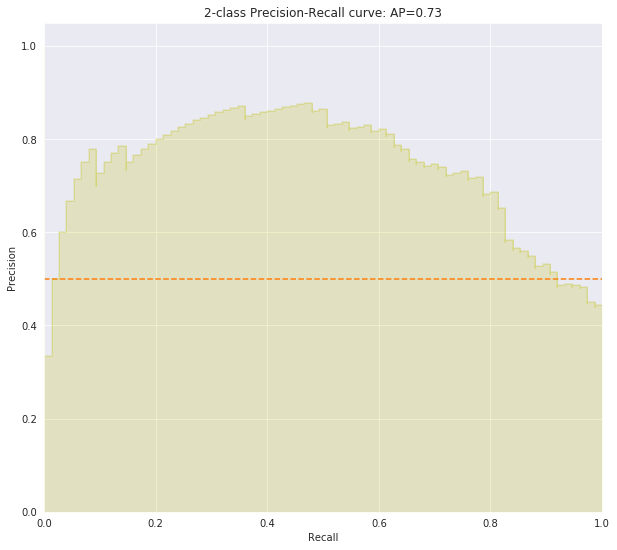

In [123]:
#::GMG::Plot Recall-Precision Curve
plt.figure(figsize = (10,9))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--', color = 'C1')
plt.step(recall_gs, precision_gs, color='y', alpha=0.2, where='post')
plt.fill_between(recall_gs, precision_gs, alpha=0.2, color='y', **step_kwargs)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(apc_gs))